In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import skimage as ski
from PIL import Image
import random

In [15]:
def normalize01(x):
    rng = (x.max() - x.min())
    return (x - x.min()) / rng if rng != 0 else np.zeros_like(x)

data_dir = "dataset/Lung"
images_dir = os.path.join(data_dir, "images")
masks_dir = os.path.join(data_dir, "sem_masks")
masks_dir_inst = os.path.join(data_dir, "inst_masks")

# image_files = sorted(os.listdir(images_dir))[:6]
# mask_files = sorted(os.listdir(masks_dir))[:6]
# mask_files_inst = sorted(os.listdir(masks_dir_inst))[:6]

image_files = sorted(os.listdir(images_dir))
chosen = np.random.randint(0, len(image_files)-1, 6)
image_files = [image_files[i] for i in chosen]
mask_files = [sorted(os.listdir(masks_dir))[i] for i in chosen]
mask_files_inst = [sorted(os.listdir(masks_dir_inst))[i] for i in chosen]



In [8]:

data_dir = "dataset/Adrenal_gland"
images_dir = os.path.join(data_dir, "images")
masks_dir = os.path.join(data_dir, "sem_masks")
masks_dir_inst = os.path.join(data_dir, "inst_masks")

# image_files = sorted(os.listdir(images_dir))[:6]
# mask_files = sorted(os.listdir(masks_dir))[:6]
# mask_files_inst = sorted(os.listdir(masks_dir_inst))[:6]

image_files = sorted(os.listdir(images_dir))
chosen = np.random.randint(0, len(image_files)-1, 6)
image_files = [image_files[i] for i in chosen]
mask_files = [sorted(os.listdir(masks_dir))[i] for i in chosen]
mask_files_inst = [sorted(os.listdir(masks_dir_inst))[i] for i in chosen]



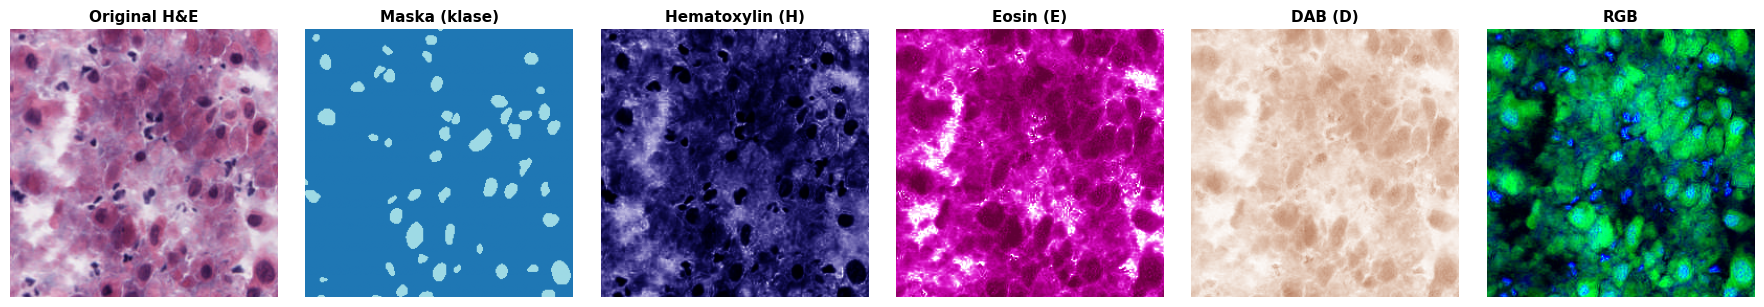

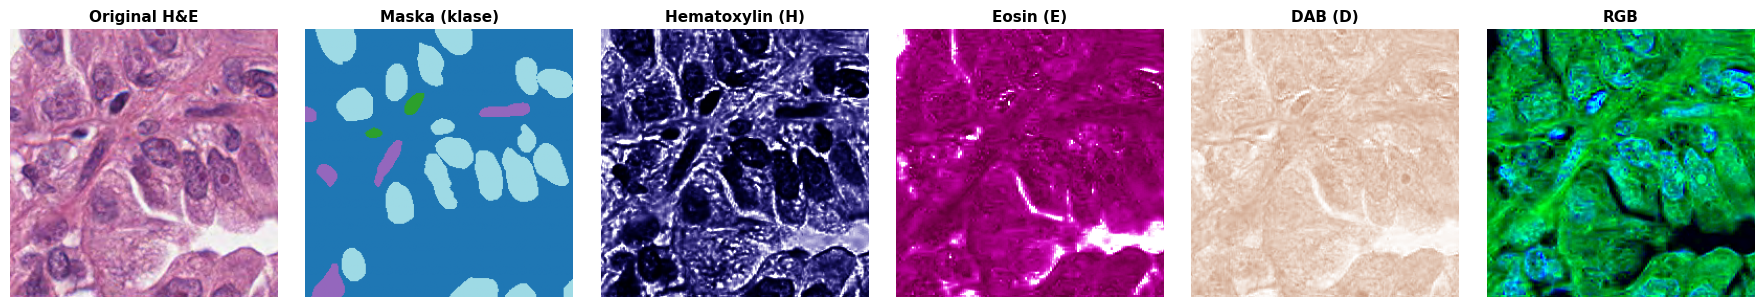

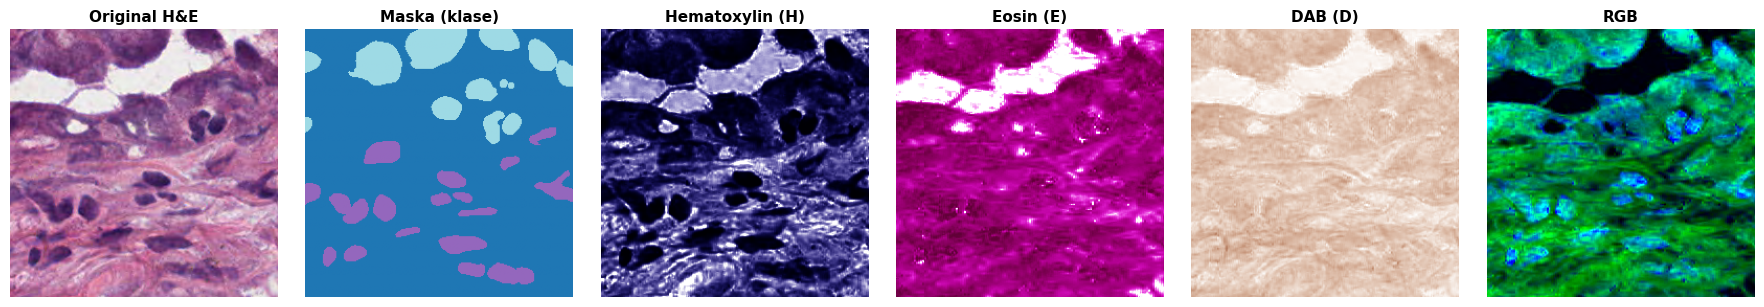

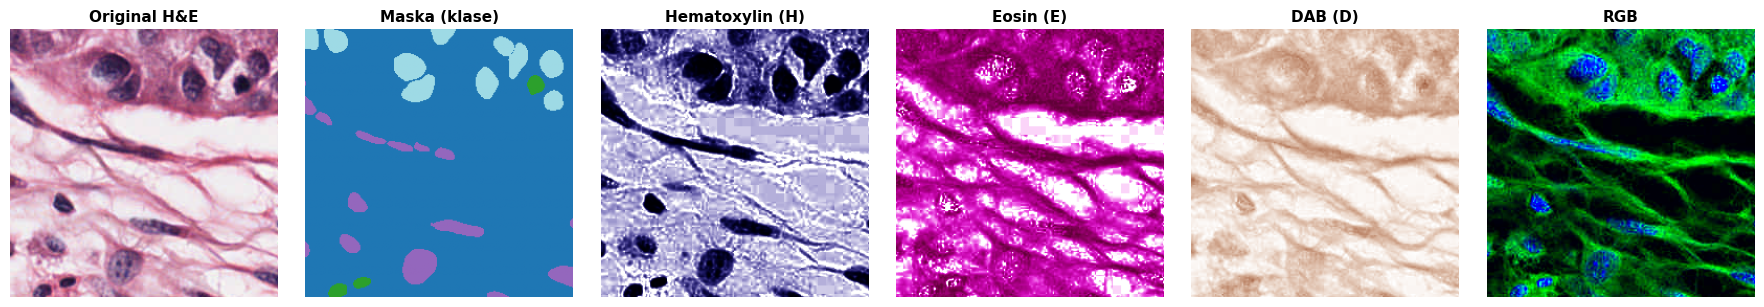

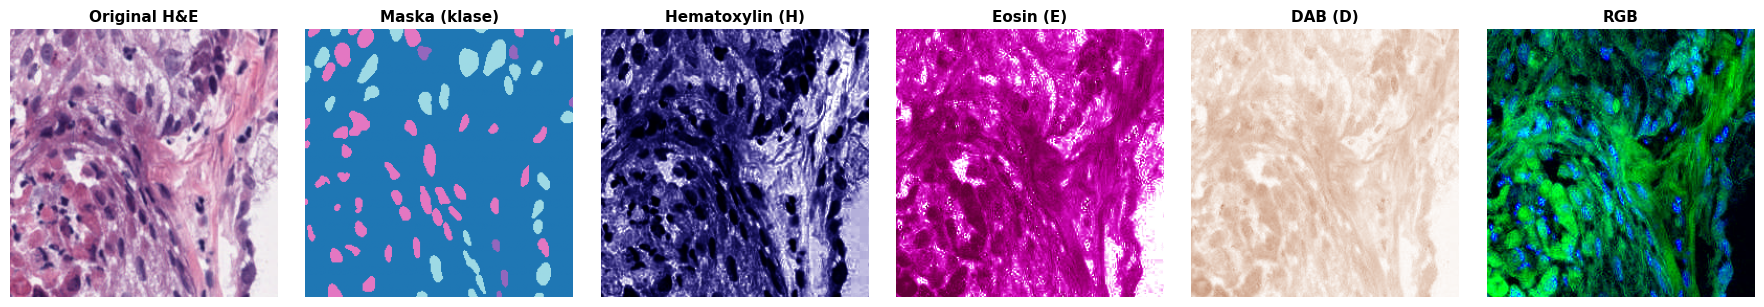

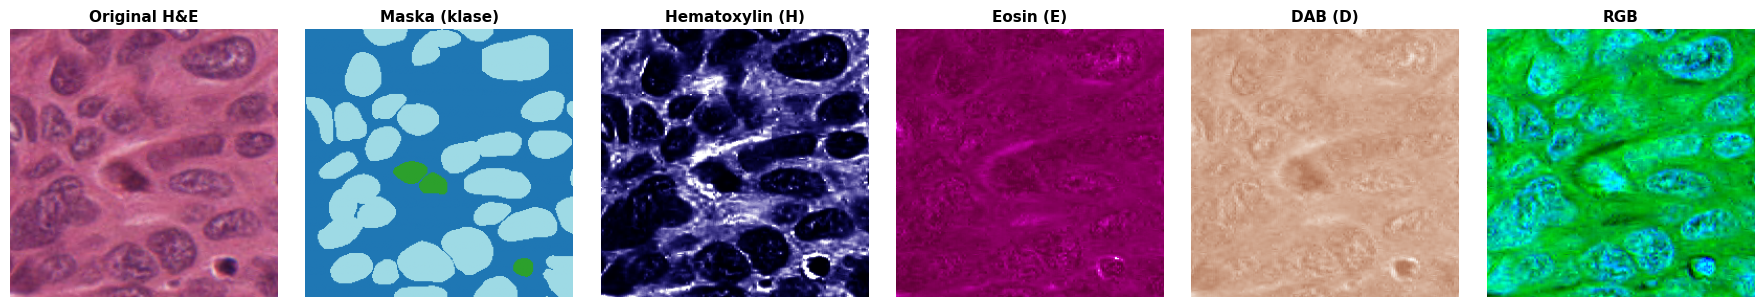

In [16]:
for img_file, mask_file in zip(image_files, mask_files):
   
    image = ski.io.imread(os.path.join(images_dir, img_file))
    mask = np.array(Image.open(os.path.join(masks_dir, mask_file)))
    hed = ski.color.rgb2hed(image)

    # Rescale hematoxylin and DAB channels and give them a fluorescence look
    h = ski.exposure.rescale_intensity(
        hed[:, :, 0],
        out_range=(0, 1),
        in_range=(0, np.percentile(hed[:, :, 0], 99)),
    )
    e = ski.exposure.rescale_intensity(
        hed[:, :, 1],
        out_range=(0, 1),
        in_range=(0, np.percentile(hed[:, :, 1], 99)),
    )

    null = np.zeros_like(hed[:, :, 0])
    ihc_h = ski.color.hed2rgb(np.stack((h, null, null), axis=-1))
    ihc_e = ski.color.hed2rgb(np.stack((null, e, null), axis=-1))
    ihc_d = ski.color.hed2rgb(np.stack((null, null, hed[:, :, 2]), axis=-1))


    # Cast the two channels into an RGB image, as the blue and green channels
    # respectively
    zdh = np.dstack((null, e, h))

    panels = [
        ("Original H&E", image, None),
        ("Maska (klase)", mask, "tab20"),
        ("Hematoxylin (H)", ihc_h, None),
        ("Eosin (E)", ihc_e, None),
        ("DAB (D)", ihc_d, None),
        ("RGB", zdh, None),
    ]
  
    fig, axes = plt.subplots(1, len(panels), figsize=(18, 5))
    for ax, (title, img, cmap) in zip(axes, panels):
        ax.imshow(img, cmap=cmap)
        ax.set_title(title, fontsize=11, fontweight="bold")
        ax.axis("off")

    plt.tight_layout(pad=2)
    plt.show()
